In [99]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, classification_report

from plot import plot_two_figures, plot_confusion_matrix, plot_each_labels
from tools import get_number_components, extract_features, remove_unclassified_input, shuffle, split_x_train_test     
from gaussian_naive_bayes import GaussianNaiveBayesClassifier

# Loading data & Pre-processing

Loading Indiana and Salinas images and their ground truth

In [90]:
indiana_img = np.load('../data/indianapines.npy')
indiana_labels = np.load('../data/indianapines_gt.npy')
salinas_img = np.load('../data/salinas.npy')
salinas_labels = np.load('../data/salinas_gt.npy')

In [91]:
# normalize radiance values to get reflectance values
indiana_img = indiana_img / indiana_img.max()
salinas_img = salinas_img / salinas_img.max()

In [92]:
print("Indiana shape: {}".format(indiana_img.shape))
print("Salinas shape: {}".format(salinas_img.shape))

Indiana shape: (145, 145, 200)
Salinas shape: (512, 217, 204)


In [5]:
# Reshaping the HSI as a 2D matrix
X_indiana = indiana_img.reshape((-1, indiana_img.shape[-1]))
print("Indiana shape: {}".format(X_indiana.shape))

X_salinas = salinas_img.reshape((-1, salinas_img.shape[-1]))
print("Salinas shape: {}".format(X_salinas.shape))

Indiana shape: (21025, 200)
Salinas shape: (111104, 204)


In [6]:
n_classes_indiana = len(np.unique(indiana_labels)) - 1
n_classes_salinas = len(np.unique(salinas_labels)) - 1

In [7]:
print("Number of labels Indiana: {}".format(n_classes_indiana))
print("Number of labels Salinas: {}".format(n_classes_salinas))

Number of labels Indiana: 16
Number of labels Salinas: 16


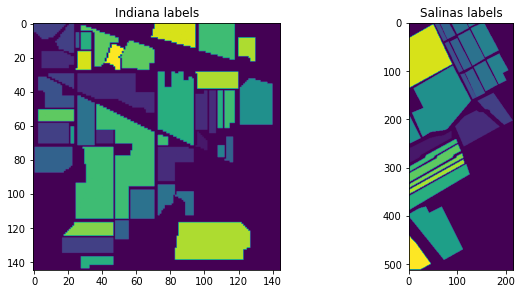

In [8]:
# Display ground truth for each image
plot_two_figures(indiana_labels, salinas_labels, title_fig1='Indiana labels', title_fig2='Salinas labels')

## Remove unclassified data

In [9]:
X_indiana, X_indiana_idx = remove_unclassified_input(X_indiana, indiana_labels)
X_salinas, X_salinas_idx = remove_unclassified_input(X_salinas, salinas_labels)

In [10]:
print(X_indiana.shape)
print(X_indiana_idx.shape)
print(X_salinas.shape)
print(X_salinas_idx.shape)

(10249, 200)
(10249,)
(54129, 204)
(54129,)


In [94]:
indiana_labels_usefull, _ = remove_unclassified_input(indiana_labels.flatten(), indiana_labels)
salinas_labels_usefull, _ = remove_unclassified_input(salinas_labels.flatten(), salinas_labels)

## PCA

PCA stands for principal component analysis. PCA is an unsupervised technique used for reduce the dimensions of the dataset. It transforms the dataset reducing the number of components in order to decrease the computational complexity of the model. 

To reduce the number of component, the PCA computes a linear transformation performing a linear mapping of the data to a lower-dimensional space. It aims to reduce the dimensions with a maximized variance of the data.

In [12]:
n_components_indiana = get_number_components(X_indiana)
n_components_salinas = get_number_components(X_salinas)

Fitting the PCA
Fitting the PCA


In [13]:
print("Number of components Indiana: {}".format(n_components_indiana))
print("Number of components Salinas: {}".format(n_components_salinas))

Number of components Indiana: 68
Number of components Salinas: 5


After retrieving the optimal number of components for each image, we need to compute a second PCA for each image to extract their features.

In [14]:
X_indiana_reduced = extract_features(X_indiana, n_components_indiana)
X_salinas_reduced = extract_features(X_salinas, n_components_salinas)

In [15]:
print("Indiana reduced data shape: {}".format(X_indiana_reduced.shape))
print("Salinas reduced data shape: {}".format(X_salinas_reduced.shape))

Indiana reduced data shape: (10249, 68)
Salinas reduced data shape: (54129, 5)


## Split train / tests

Manually split between train and tests, as the dataset is unbalanced between each class, it's not possible to use train_test_split.

In [95]:
# shuffle manually
X_indiana_shuffle, indiana_labels_shuffle, shuffle_arr_indiana = shuffle(X_indiana_reduced, indiana_labels_usefull)
X_salinas_shuffle, salinas_labels_shuffle, shuffle_arr_salinas = shuffle(X_salinas_reduced, salinas_labels_usefull)

In [40]:
y_indiana_labels_argsort = np.argsort(indiana_labels_shuffle)
y_salinas_labels_argsort = np.argsort(salinas_labels_shuffle)

In [41]:
labels_indiana, count_indiana = np.unique(indiana_labels_shuffle-1, return_counts=True)
labels_salinas, count_salinas = np.unique(salinas_labels_shuffle-1, return_counts=True)

In [42]:
x_train_indiana, x_test_indiana, y_train_indiana_labels, y_test_indiana_labels = split_x_train_test(X_indiana_shuffle, count_indiana, labels_indiana, y_indiana_labels_argsort, (0, n_components_indiana))

Cluster: 0
Nb total samples: 46
Nb samples train: 34
Nb samples test: 12
---------------
Cluster: 1
Nb total samples: 1428
Nb samples train: 1071
Nb samples test: 357
---------------
Cluster: 2
Nb total samples: 830
Nb samples train: 622
Nb samples test: 208
---------------
Cluster: 3
Nb total samples: 237
Nb samples train: 177
Nb samples test: 60
---------------
Cluster: 4
Nb total samples: 483
Nb samples train: 362
Nb samples test: 121
---------------
Cluster: 5
Nb total samples: 730
Nb samples train: 547
Nb samples test: 183
---------------
Cluster: 6
Nb total samples: 28
Nb samples train: 21
Nb samples test: 7
---------------
Cluster: 7
Nb total samples: 478
Nb samples train: 358
Nb samples test: 120
---------------
Cluster: 8
Nb total samples: 20
Nb samples train: 15
Nb samples test: 5
---------------
Cluster: 9
Nb total samples: 972
Nb samples train: 729
Nb samples test: 243
---------------
Cluster: 10
Nb total samples: 2455
Nb samples train: 1841
Nb samples test: 614
-----------

In [43]:
x_train_salinas, x_test_salinas, y_train_salinas_labels, y_test_salinas_labels = split_x_train_test(X_salinas_shuffle, count_salinas, labels_salinas, y_salinas_labels_argsort, (0, n_components_salinas))

Cluster: 0
Nb total samples: 2009
Nb samples train: 1506
Nb samples test: 503
---------------
Cluster: 1
Nb total samples: 3726
Nb samples train: 2794
Nb samples test: 932
---------------
Cluster: 2
Nb total samples: 1976
Nb samples train: 1482
Nb samples test: 494
---------------
Cluster: 3
Nb total samples: 1394
Nb samples train: 1045
Nb samples test: 349
---------------
Cluster: 4
Nb total samples: 2678
Nb samples train: 2008
Nb samples test: 670
---------------
Cluster: 5
Nb total samples: 3959
Nb samples train: 2969
Nb samples test: 990
---------------
Cluster: 6
Nb total samples: 3579
Nb samples train: 2684
Nb samples test: 895
---------------
Cluster: 7
Nb total samples: 11271
Nb samples train: 8453
Nb samples test: 2818
---------------
Cluster: 8
Nb total samples: 6203
Nb samples train: 4652
Nb samples test: 1551
---------------
Cluster: 9
Nb total samples: 3278
Nb samples train: 2458
Nb samples test: 820
---------------
Cluster: 10
Nb total samples: 1068
Nb samples train: 801


In [44]:
print("Indiana")
print("Train shape: {}".format(x_train_indiana.shape))
print("Train labels shape: {}".format(y_train_indiana_labels.shape))
print("Test shape: {}".format(x_test_indiana.shape))
print("Test labels shape: {}".format(y_test_indiana_labels.shape))
print("----------")
print("Indiana")
print("Train shape: {}".format(x_train_salinas.shape))
print("Train labels shape: {}".format(y_train_salinas_labels.shape))
print("Test shape: {}".format(x_test_salinas.shape))
print("Test labels shape: {}".format(y_test_salinas_labels.shape))

Indiana
Train shape: (7680, 68)
Train labels shape: (7680,)
Test shape: (2569, 68)
Test labels shape: (2569,)
----------
Indiana
Train shape: (40592, 5)
Train labels shape: (40592,)
Test shape: (13537, 5)
Test labels shape: (13537,)


## Supervised model

Gaussian Naive Bayes Classifier

Gaussian Naive Bayes classifier is a supervised generative model.
The idea is to fit a number of gaussian in a supervised way in the dataset.
In this notebook the covariance matrix for each gaussian is the identity matrix.

In [45]:
nb_classes = np.unique(y_train_indiana_labels).size

In [51]:
n_features_indiana = x_train_indiana.shape[-1]
n_features_salinas = x_train_salinas.shape[-1]

indiana_model_naive_bayes = GaussianNaiveBayesClassifier(nb_gaussian=nb_classes, n_features=n_features_indiana)
salinas_model_naive_bayes = GaussianNaiveBayesClassifier(nb_gaussian=nb_classes, n_features=n_features_salinas)

In [52]:
indiana_model_naive_bayes.fit(x_train_indiana, y_train_indiana_labels)

Fit Gaussian nb. 0
Fit Gaussian nb. 1
Fit Gaussian nb. 2
Fit Gaussian nb. 3
Fit Gaussian nb. 4
Fit Gaussian nb. 5
Fit Gaussian nb. 6
Fit Gaussian nb. 7
Fit Gaussian nb. 8
Fit Gaussian nb. 9
Fit Gaussian nb. 10
Fit Gaussian nb. 11
Fit Gaussian nb. 12
Fit Gaussian nb. 13
Fit Gaussian nb. 14
Fit Gaussian nb. 15


In [53]:
salinas_model_naive_bayes.fit(x_train_salinas, y_train_salinas_labels)

Fit Gaussian nb. 0
Fit Gaussian nb. 1
Fit Gaussian nb. 2
Fit Gaussian nb. 3
Fit Gaussian nb. 4
Fit Gaussian nb. 5
Fit Gaussian nb. 6
Fit Gaussian nb. 7
Fit Gaussian nb. 8
Fit Gaussian nb. 9
Fit Gaussian nb. 10
Fit Gaussian nb. 11
Fit Gaussian nb. 12
Fit Gaussian nb. 13
Fit Gaussian nb. 14
Fit Gaussian nb. 15


Test the indiana model on train / test data

In [28]:
train_acc = []
for label in labels_indiana:
    idxs = np.argwhere(y_train_indiana_labels == label).flatten()
    preds = indiana_model_naive_bayes.predict(x_train_indiana[idxs])
    acc = indiana_model_naive_bayes.measure_accuracy(preds, y_train_indiana_labels[idxs])
    train_acc.append(acc)
    print("Class: {}".format(label))
    print("Nb samples: {}".format(y_train_indiana_labels[idxs].size))
    print("Score: {}".format(acc))
    print("-----------")
    
print("Mean accuracy per class: {}".format(np.array(train_acc).mean()))

Class: 0
Nb samples: 34
Score: 0.9117647058823529
-----------
Class: 1
Nb samples: 1071
Score: 0.5340802987861811
-----------
Class: 2
Nb samples: 622
Score: 0.15434083601286175
-----------
Class: 3
Nb samples: 177
Score: 0.20903954802259886
-----------
Class: 4
Nb samples: 362
Score: 0.04143646408839779
-----------
Class: 5
Nb samples: 547
Score: 0.34186471663619744
-----------
Class: 6
Nb samples: 21
Score: 0.9047619047619048
-----------
Class: 7
Nb samples: 358
Score: 0.7067039106145251
-----------
Class: 8
Nb samples: 15
Score: 0.8666666666666667
-----------
Class: 9
Nb samples: 729
Score: 0.38820301783264743
-----------
Class: 10
Nb samples: 1841
Score: 0.24443237370994025
-----------
Class: 11
Nb samples: 444
Score: 0.31756756756756754
-----------
Class: 12
Nb samples: 153
Score: 0.9150326797385621
-----------
Class: 13
Nb samples: 948
Score: 0.8227848101265823
-----------
Class: 14
Nb samples: 289
Score: 0.2629757785467128
-----------
Class: 15
Nb samples: 69
Score: 0.9565217391

In [29]:
test_acc = []

for label in labels_indiana:
    idxs = np.argwhere(y_test_indiana_labels == label).flatten()
    preds = indiana_model_naive_bayes.predict(x_test_indiana[idxs])
    acc = indiana_model_naive_bayes.measure_accuracy(preds, y_test_indiana_labels[idxs])
    test_acc.append(acc)
    print("Class: {}".format(label))
    print("Nb samples: {}".format(y_test_indiana_labels[idxs].size))
    print("Score: {}".format(acc))
    print("-----------")
    
print("Mean accuracy per class: {}".format(np.array(test_acc).mean()))

Class: 0
Nb samples: 12
Score: 0.8333333333333334
-----------
Class: 1
Nb samples: 357
Score: 0.5238095238095238
-----------
Class: 2
Nb samples: 208
Score: 0.20673076923076922
-----------
Class: 3
Nb samples: 60
Score: 0.18333333333333332
-----------
Class: 4
Nb samples: 121
Score: 0.008264462809917356
-----------
Class: 5
Nb samples: 183
Score: 0.3879781420765027
-----------
Class: 6
Nb samples: 7
Score: 1.0
-----------
Class: 7
Nb samples: 120
Score: 0.7166666666666667
-----------
Class: 8
Nb samples: 5
Score: 0.6
-----------
Class: 9
Nb samples: 243
Score: 0.37037037037037035
-----------
Class: 10
Nb samples: 614
Score: 0.22312703583061888
-----------
Class: 11
Nb samples: 149
Score: 0.28859060402684567
-----------
Class: 12
Nb samples: 52
Score: 0.9423076923076923
-----------
Class: 13
Nb samples: 317
Score: 0.8422712933753943
-----------
Class: 14
Nb samples: 97
Score: 0.2268041237113402
-----------
Class: 15
Nb samples: 24
Score: 0.9583333333333334
-----------
Mean accuracy per 

Test the salinas model on train / test

In [54]:
train_acc = []
for label in labels_salinas:
    idxs = np.argwhere(y_train_salinas_labels == label).flatten()
    preds = salinas_model_naive_bayes.predict(x_train_salinas[idxs])
    acc = salinas_model_naive_bayes.measure_accuracy(preds, y_train_salinas_labels[idxs])
    train_acc.append(acc)
    print("Class: {}".format(label))
    print("Nb samples: {}".format(y_train_salinas_labels[idxs].size))
    print("Score: {}".format(acc))
    print("-----------")
    
print("Mean accuracy per class: {}".format(np.array(train_acc).mean()))

Class: 0
Nb samples: 1506
Score: 0.9867197875166003
-----------
Class: 1
Nb samples: 2794
Score: 0.7913385826771654
-----------
Class: 2
Nb samples: 1482
Score: 0.7503373819163293
-----------
Class: 3
Nb samples: 1045
Score: 0.9856459330143541
-----------
Class: 4
Nb samples: 2008
Score: 0.9546812749003984
-----------
Class: 5
Nb samples: 2969
Score: 0.9663186257999327
-----------
Class: 6
Nb samples: 2684
Score: 0.9877049180327869
-----------
Class: 7
Nb samples: 8453
Score: 0.6148113095942269
-----------
Class: 8
Nb samples: 4652
Score: 0.8996130696474635
-----------
Class: 9
Nb samples: 2458
Score: 0.23474369406021156
-----------
Class: 10
Nb samples: 801
Score: 0.797752808988764
-----------
Class: 11
Nb samples: 1445
Score: 0.9093425605536333
-----------
Class: 12
Nb samples: 687
Score: 0.9868995633187773
-----------
Class: 13
Nb samples: 802
Score: 0.8890274314214464
-----------
Class: 14
Nb samples: 5451
Score: 0.6108970831040176
-----------
Class: 15
Nb samples: 1355
Score: 0.51

In [56]:
test_acc = []
for label in labels_salinas:
    idxs = np.argwhere(y_test_salinas_labels == label).flatten()
    preds = salinas_model_naive_bayes.predict(x_test_salinas[idxs])
    acc = salinas_model_naive_bayes.measure_accuracy(preds, y_test_salinas_labels[idxs])
    test_acc.append(acc)
    print("Class: {}".format(label))
    print("Nb samples: {}".format(y_test_salinas_labels[idxs].size))
    print("Score: {}".format(acc))
    print("-----------")
    
print("Mean accuracy per class: {}".format(np.array(test_acc).mean()))

Class: 0
Nb samples: 503
Score: 0.9761431411530815
-----------
Class: 1
Nb samples: 932
Score: 0.7929184549356223
-----------
Class: 2
Nb samples: 494
Score: 0.7813765182186235
-----------
Class: 3
Nb samples: 349
Score: 0.994269340974212
-----------
Class: 4
Nb samples: 670
Score: 0.9537313432835821
-----------
Class: 5
Nb samples: 990
Score: 0.9656565656565657
-----------
Class: 6
Nb samples: 895
Score: 0.9843575418994414
-----------
Class: 7
Nb samples: 2818
Score: 0.5908445706174592
-----------
Class: 8
Nb samples: 1551
Score: 0.8884590586718246
-----------
Class: 9
Nb samples: 820
Score: 0.23414634146341465
-----------
Class: 10
Nb samples: 267
Score: 0.7865168539325843
-----------
Class: 11
Nb samples: 482
Score: 0.9128630705394191
-----------
Class: 12
Nb samples: 229
Score: 0.982532751091703
-----------
Class: 13
Nb samples: 268
Score: 0.8917910447761194
-----------
Class: 14
Nb samples: 1817
Score: 0.6075949367088608
-----------
Class: 15
Nb samples: 452
Score: 0.5464601769911

Classification report for Indiana model

In [65]:
total_preds_indiana = indiana_model_naive_bayes.predict(x_test_indiana)

In [66]:
indiana_class_names = np.arange(n_classes_indiana).astype(str)

In [67]:
print(classification_report(y_test_indiana_labels, total_preds_indiana, target_names=indiana_class_names))

              precision    recall  f1-score   support

           0       0.32      0.83      0.47        12
           1       0.30      0.52      0.38       357
           2       0.46      0.21      0.29       208
           3       0.17      0.18      0.18        60
           4       0.03      0.01      0.01       121
           5       0.66      0.39      0.49       183
           6       0.13      1.00      0.24         7
           7       0.99      0.72      0.83       120
           8       0.03      0.60      0.06         5
           9       0.36      0.37      0.37       243
          10       0.54      0.22      0.32       614
          11       0.17      0.29      0.21       149
          12       0.32      0.94      0.48        52
          13       0.75      0.84      0.79       317
          14       0.24      0.23      0.24        97
          15       0.88      0.96      0.92        24

    accuracy                           0.41      2569
   macro avg       0.40   

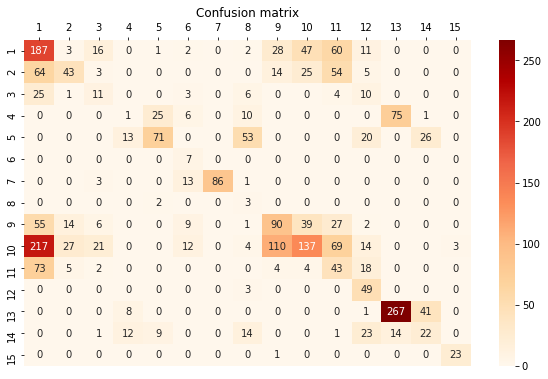

In [75]:
plot_confusion_matrix(y_test_indiana_labels, total_preds_indiana, class_names=np.arange(1, 16), log=False)

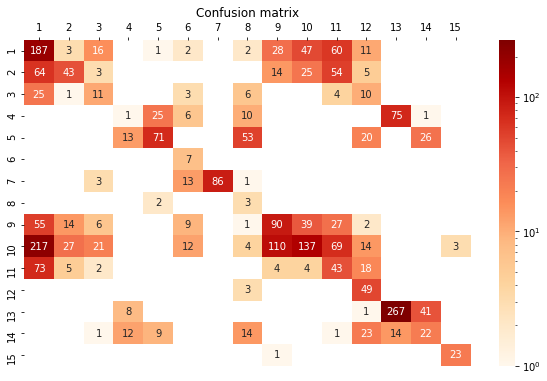

In [74]:
plot_confusion_matrix(y_test_indiana_labels, total_preds_indiana, class_names=np.arange(1, 16), log=True)

Classification report for Salinas model

In [57]:
total_preds_salinas = salinas_model_naive_bayes.predict(x_test_salinas)

In [58]:
salinas_class_names = np.arange(n_classes_salinas).astype(str)

In [60]:
print(classification_report(y_test_salinas_labels, total_preds_salinas, target_names=salinas_class_names))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       503
           1       0.98      0.79      0.88       932
           2       0.84      0.78      0.81       494
           3       0.94      0.99      0.97       349
           4       0.89      0.95      0.92       670
           5       1.00      0.97      0.98       990
           6       0.89      0.98      0.93       895
           7       0.70      0.59      0.64      2818
           8       0.89      0.89      0.89      1551
           9       0.85      0.23      0.37       820
          10       0.30      0.79      0.43       267
          11       0.83      0.91      0.87       482
          12       0.50      0.98      0.66       229
          13       0.89      0.89      0.89       268
          14       0.51      0.61      0.55      1817
          15       0.69      0.55      0.61       452

    accuracy                           0.75     13537
   macro avg       0.78   

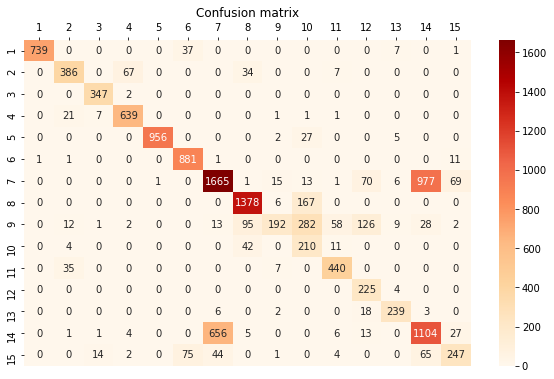

In [78]:
plot_confusion_matrix(y_test_salinas_labels, total_preds_salinas, class_names=np.arange(1, 16), log=False)

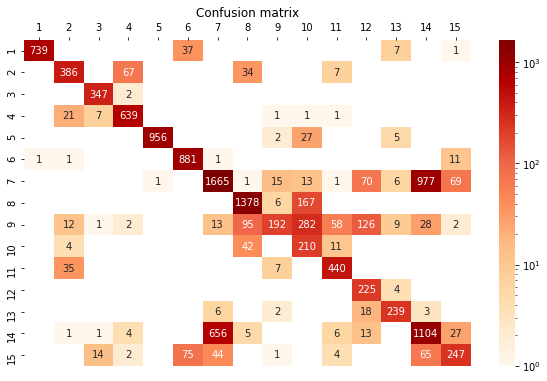

In [79]:
plot_confusion_matrix(y_test_salinas_labels, total_preds_salinas, class_names=np.arange(1, 16), log=True)

### Rebuild the image and plot

Indiana

In [81]:
total_preds_indiana = indiana_model_naive_bayes.predict(X_indiana_reduced)

In [82]:
indiana_preds_img = np.zeros((indiana_img.shape[0] * indiana_img.shape[1]))
indiana_preds_img[X_indiana_idx] = total_preds_indiana
indiana_preds_img = indiana_preds_img.reshape(((indiana_img.shape[0], indiana_img.shape[1])))

In [89]:
indiana_labels.shape

(10249,)

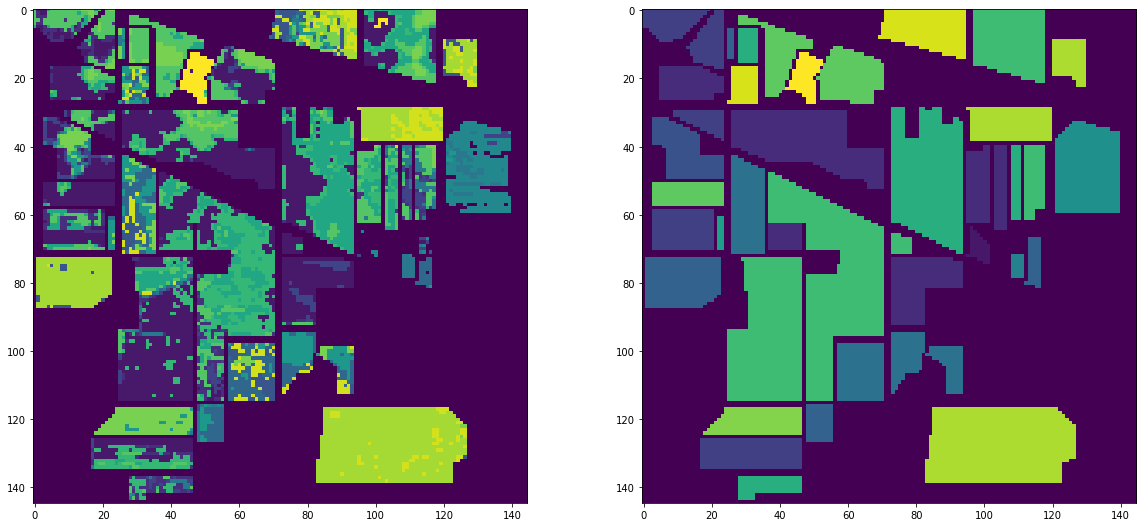

In [97]:
plot_two_figures(indiana_preds_img, indiana_labels, figsize=(20, 20))

In [106]:
#plot_each_labels(indiana_labels, indiana_preds_img, n_classes_indiana, figsize=(20, 20), cmap='gray')

Salinas

In [107]:
total_preds_salinas = salinas_model_naive_bayes.predict(X_salinas_reduced)

In [108]:
salinas_preds_img = np.zeros((salinas_img.shape[0] * salinas_img.shape[1]))
salinas_preds_img[X_salinas_idx] = total_preds_salinas
salinas_preds_img = salinas_preds_img.reshape(((salinas_img.shape[0], salinas_img.shape[1])))

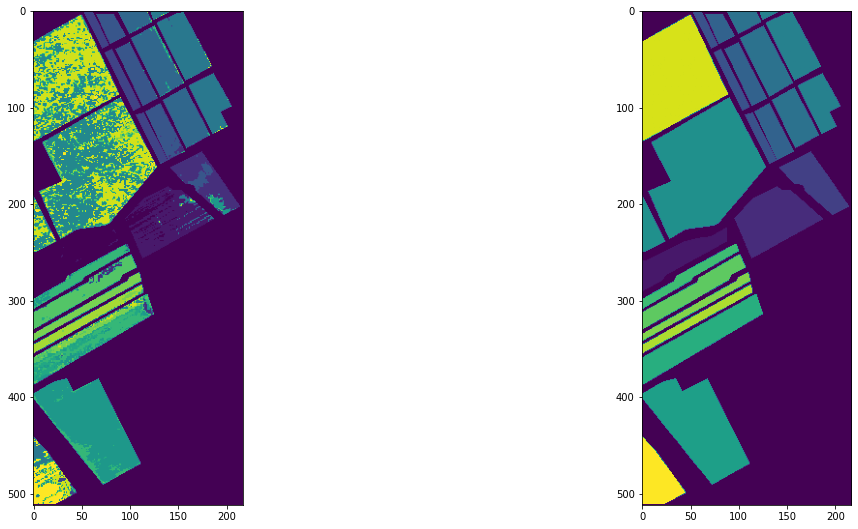

In [111]:
plot_two_figures(salinas_preds_img, salinas_labels, figsize=(20, 20))

In [115]:
#plot_each_labels(salinas_labels, salinas_preds_img, n_classes_salinas, figsize=(20, 20), cmap='gray')